# Dans cette étude de cas, nous définirons un algorithme permettant de prédire si un client annulera son abonnement en fonction de ses habitudes sur l'application financières .

Description of each Columns
- userid - MongoDB userid
- churn  - Active = No | Suspended < 30 = No Else Churn = Yes
- age - age of the customer
- city - city of the customer
- state- state where the customer lives
- postal_code - zip code of the customer
- zodiac_sign- zodiac sign of the customer
- rent_or_own - Does the customer rents or owns a house 
- more_than_one_mobile_device - does the customer use more than one mobile device
- payFreq- Pay Frequency of the cusomter
- in_collections - is the customer in collections
- loan_pending - is the loan pending
- withdrawn_application - has the customer withdrawn the loan applicaiton 
- paid_off_loan- has the customer paid of the loan
- did_not_accept_funding - customer did not accept funding
- cash_back_engagement - Sum of cash back dollars received by a customer / No of days in the app
- cash_back_amount - Sum of cash back dollars received by a customer
- used_ios- Has the user used an iphone
- used_android - Has the user used a android based phone
- has_used_mobile_and_web - Has the user used mobile and web platforms
- has_used_web - Has the user used MoneyLion Web app
- has_used_mobile - as the user used MoneyLion  app
- has_reffered- Has the user referred
- cards_clicked - How many times a user has clicked the cards
- cards_not_helpful- How helpful was the cards
- cards_helpful- How helpful was the cards
- cards_viewed- How many times a user viewed the cards
- cards_share- How many times a user shared his cards
- trivia_view_results-How many times a user viewed trivia results
- trivia_view_unlocked- How many times a user viewed trivia view unlocked screen
- trivia_view_locked - How many times a user viewed trivia view locked screen
- trivia_shared_results- How many times a user shared trivia results 
- trivia_played - How many times a user played trivia 
- re_linked_account- Has the user re linked account
- un_linked_account - Has the user un linked account
- credit_score - Customer's credit score

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
sns.set(rc={'figure.figsize' : (16,9)} , font_scale=1.5 , style='whitegrid')

In [4]:
df = pd.read_csv('churn_data.csv')
df.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0


In [5]:
df.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

# résumé statistique

In [6]:
df.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


# nombre des valeurs null dans le tableau

In [7]:
df.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [8]:
df = df[pd.notnull(df['age'])]

In [9]:
df = df.drop(columns=['credit_score' , 'rewards_earned'])

In [10]:
df.isna().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

In [11]:
df.index = df['user'].values

In [12]:
df = df.drop(columns="user" , axis=1)
df.head()

,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
55409,0,37.0,na,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
23547,0,28.0,R,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,1.47,1
58313,0,35.0,R,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
8095,0,26.0,R,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
61353,1,27.0,na,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


# parcelle de distribution

C:\Users\Yasha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Yasha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Yasha\AppData\Roaming\Python\Python36\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


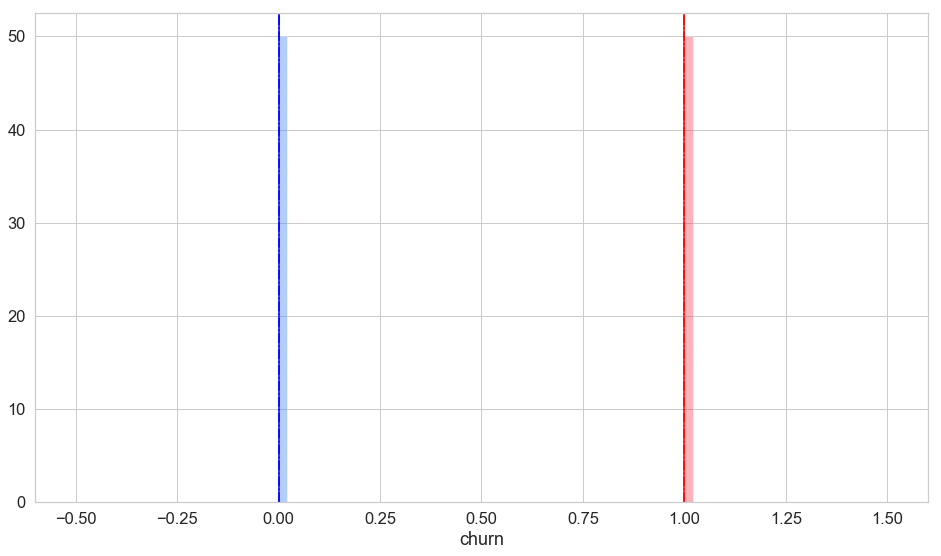

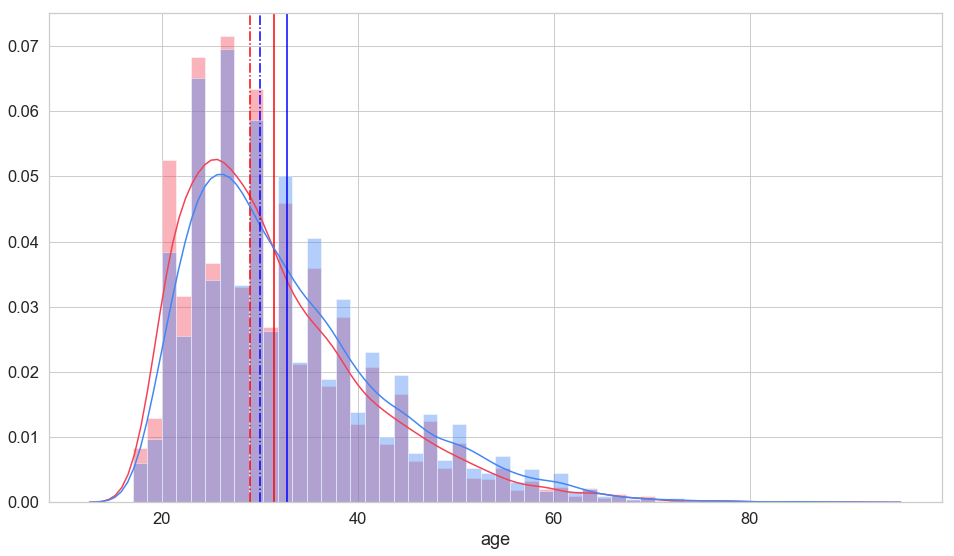

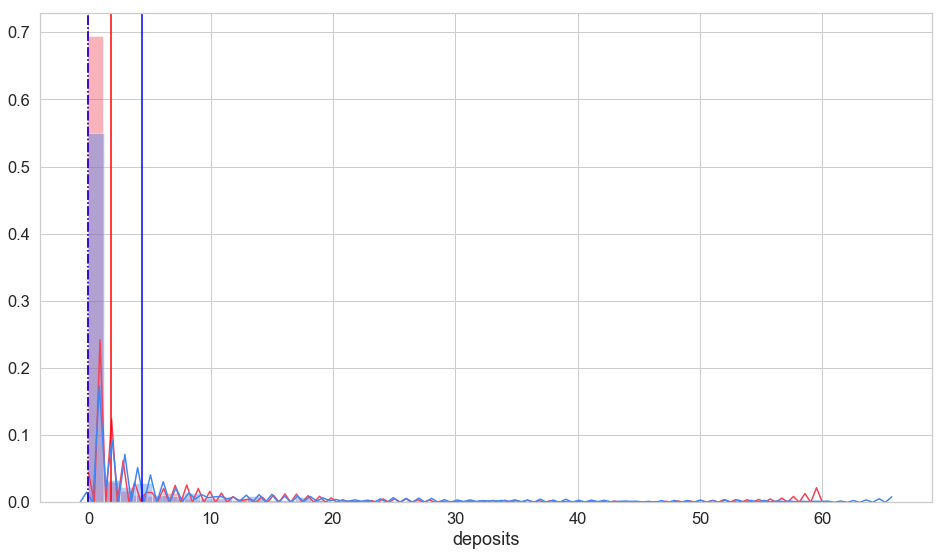

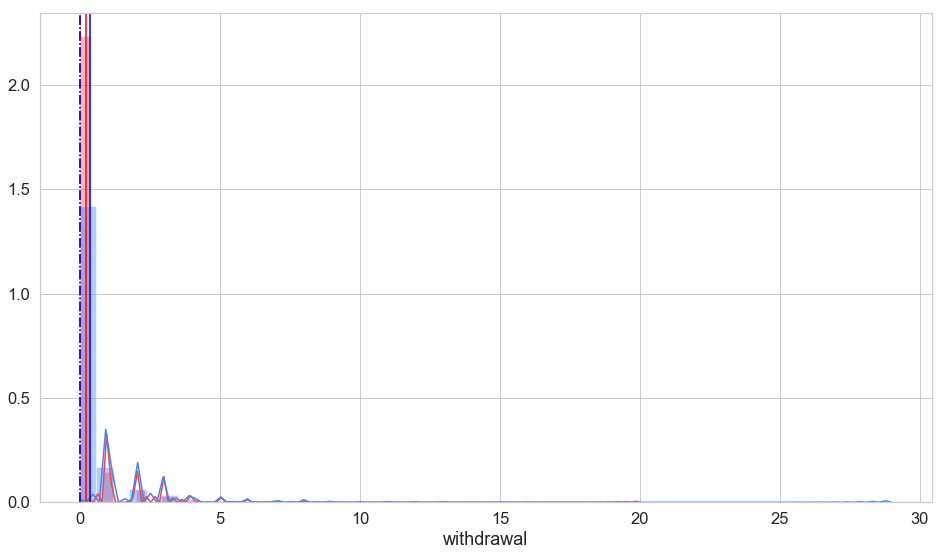

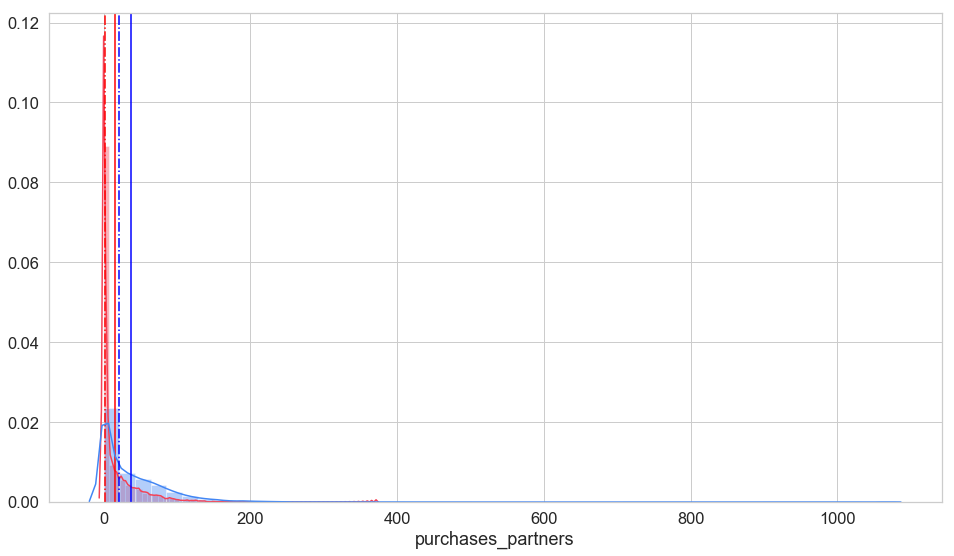

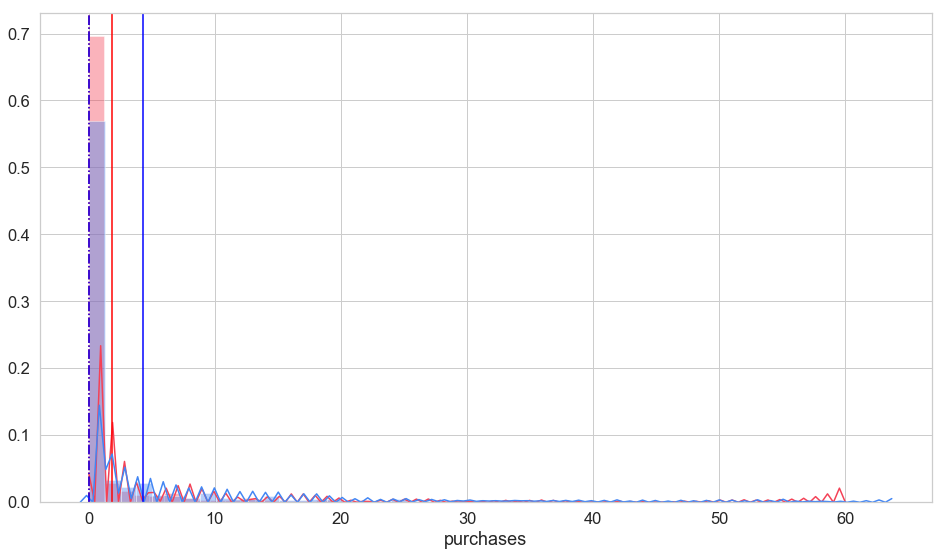

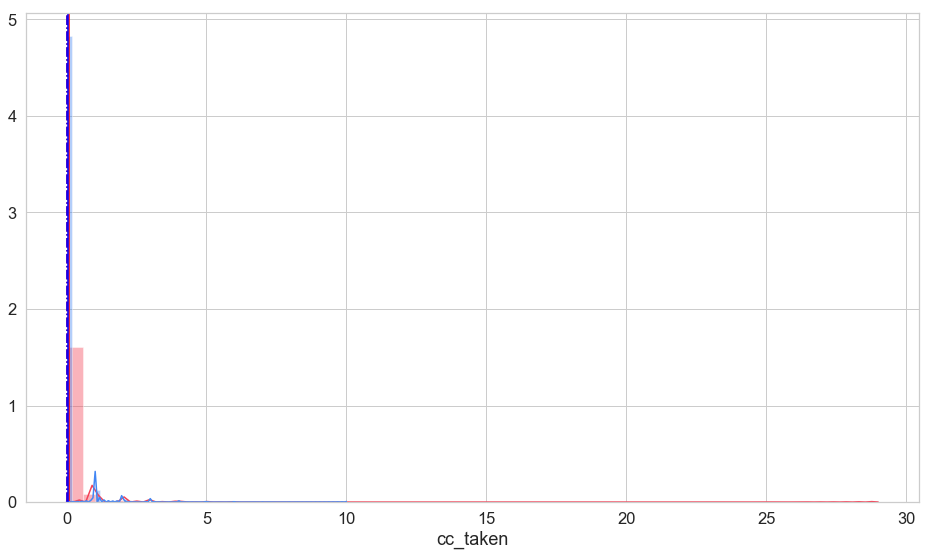

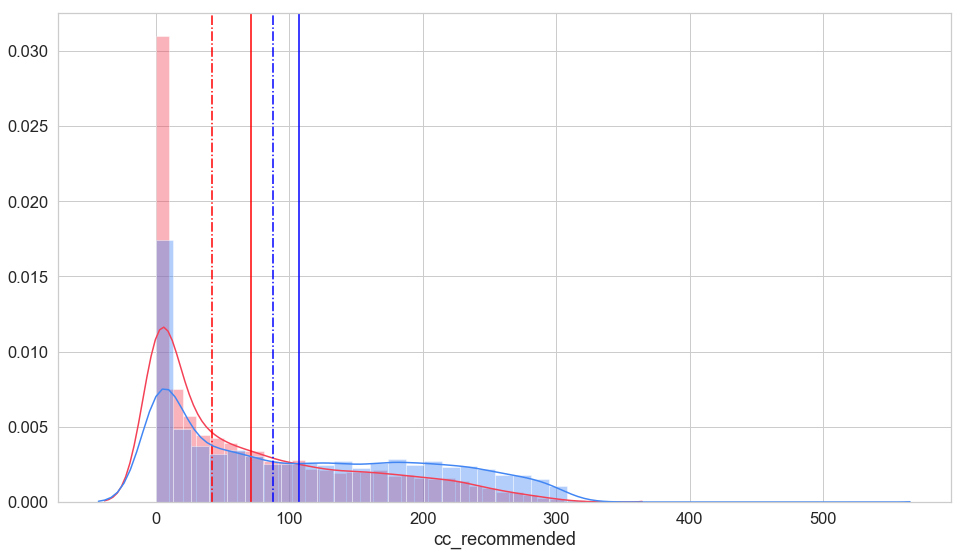

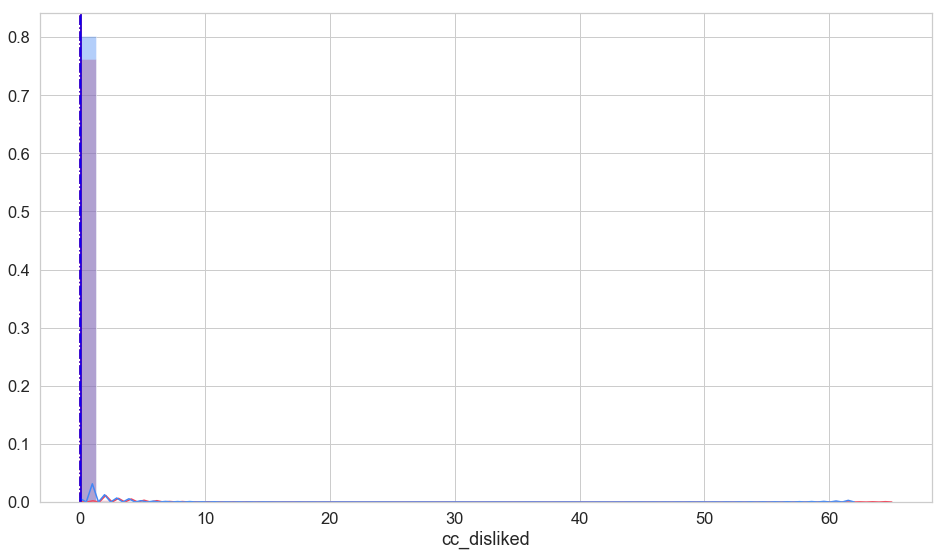

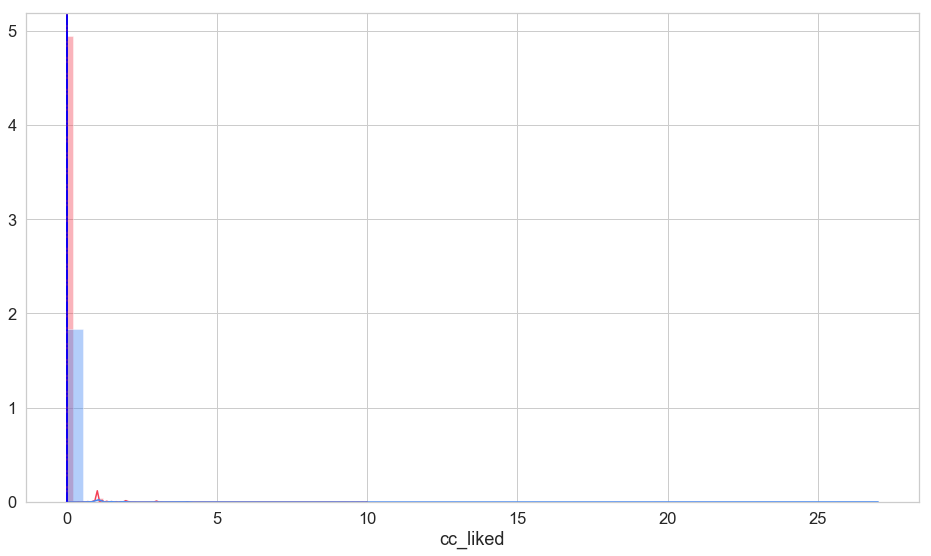

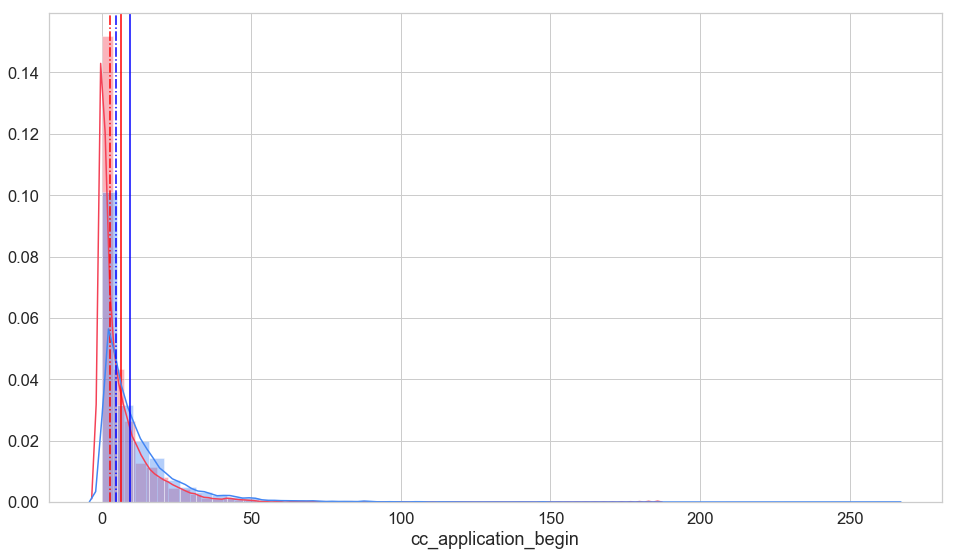

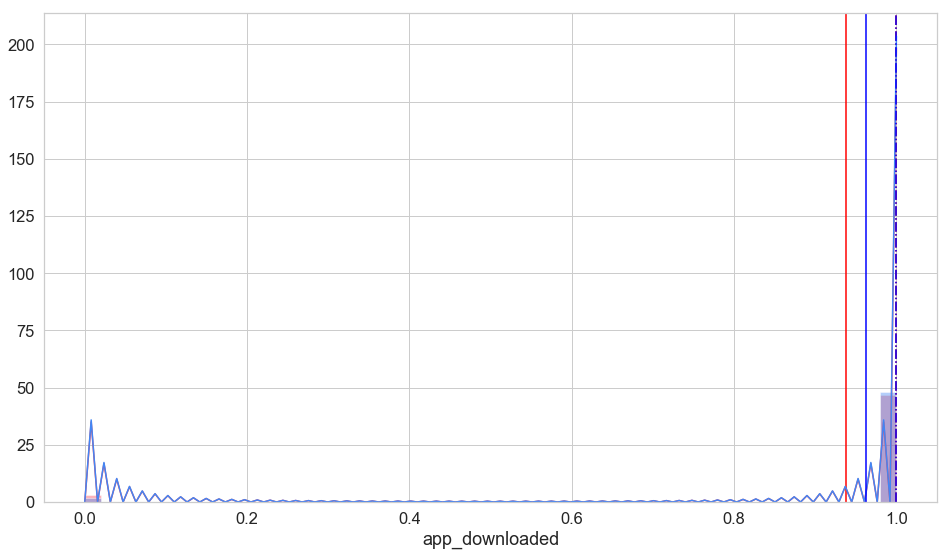

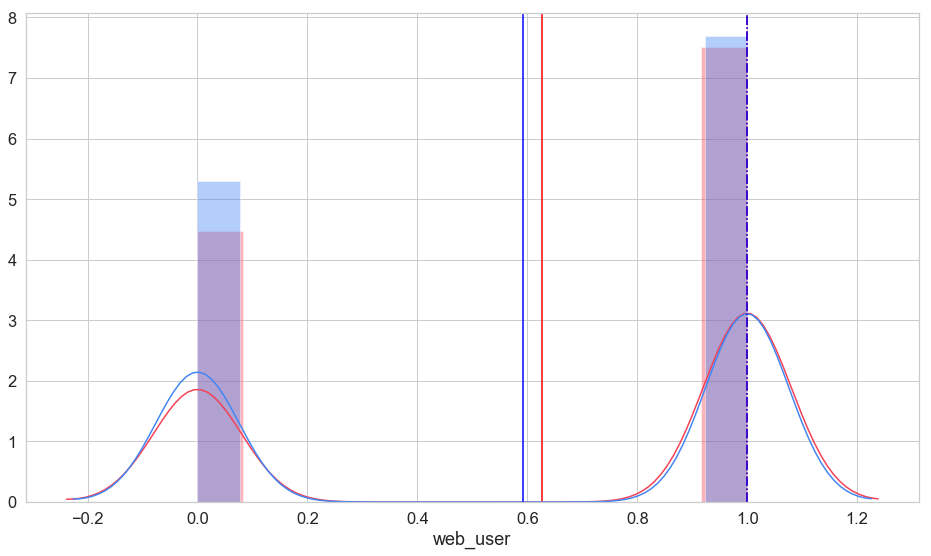

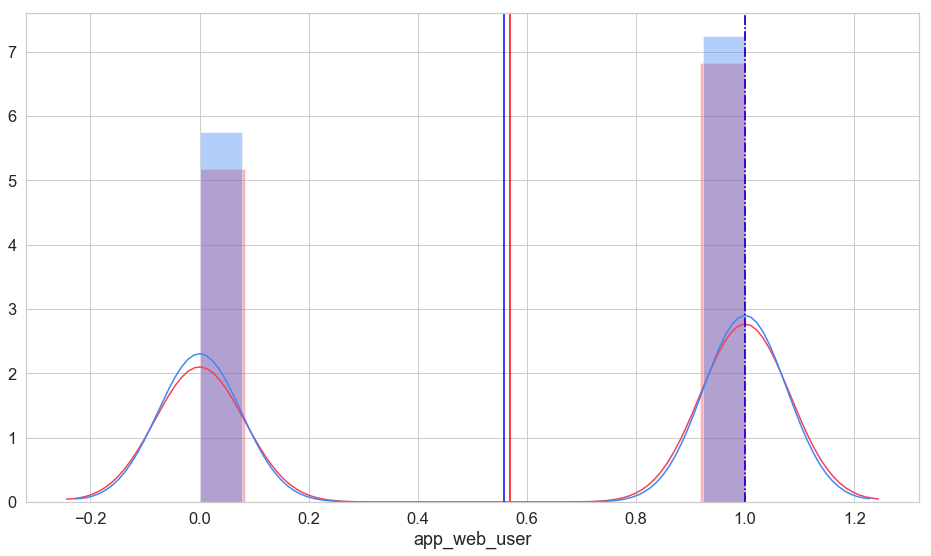

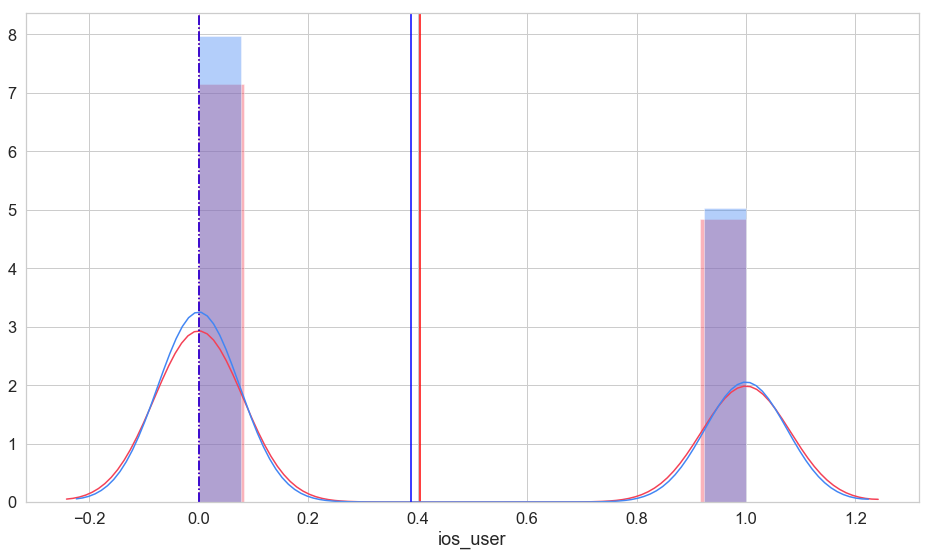

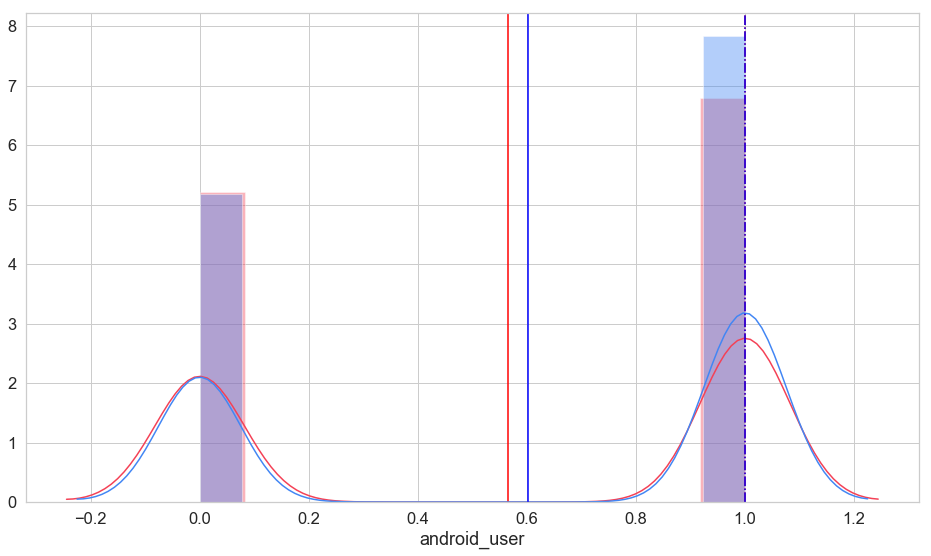

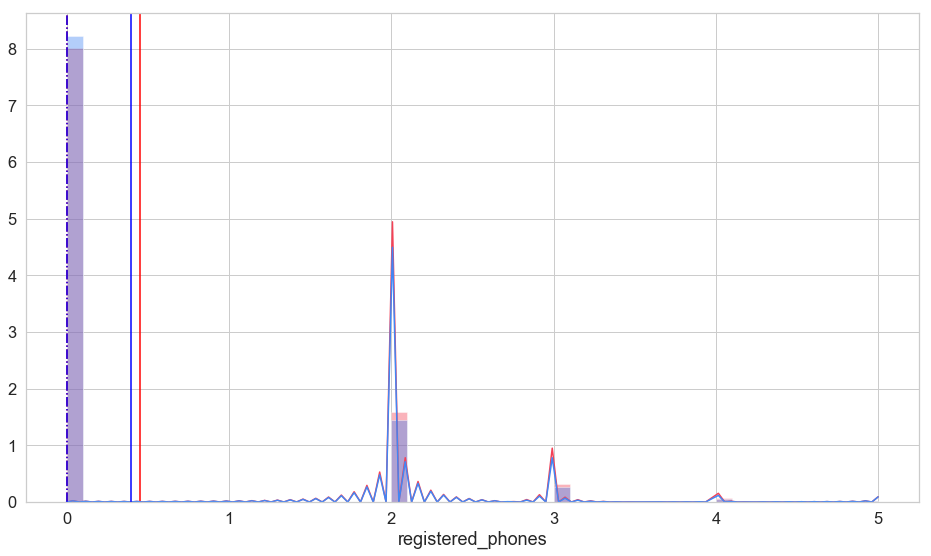

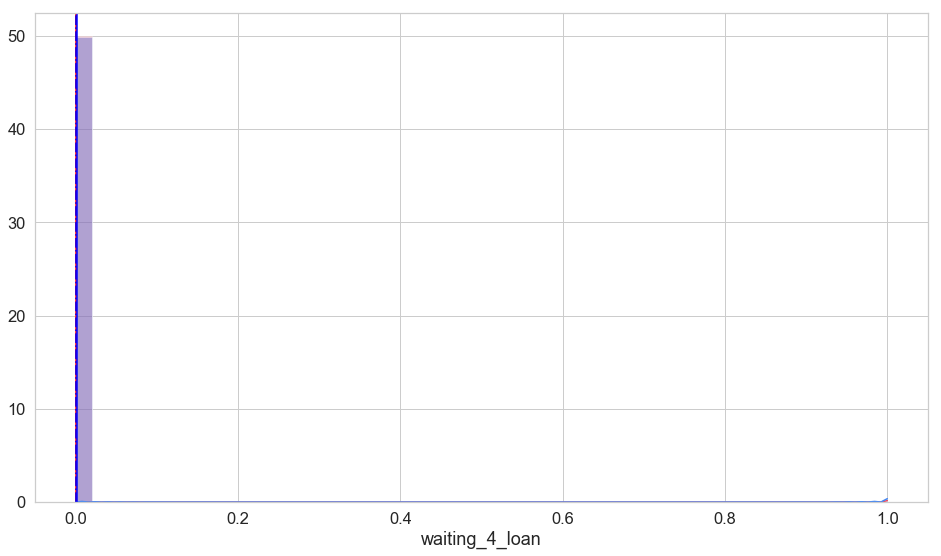

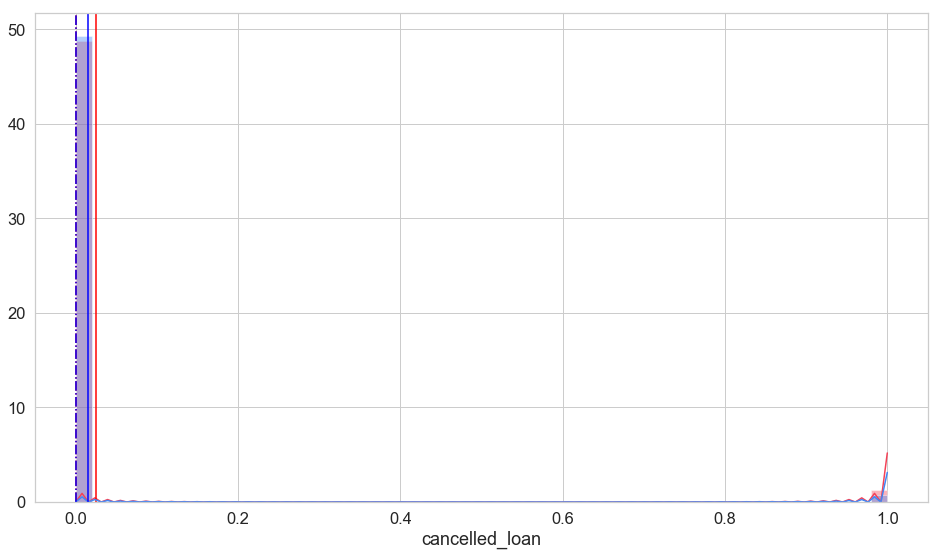

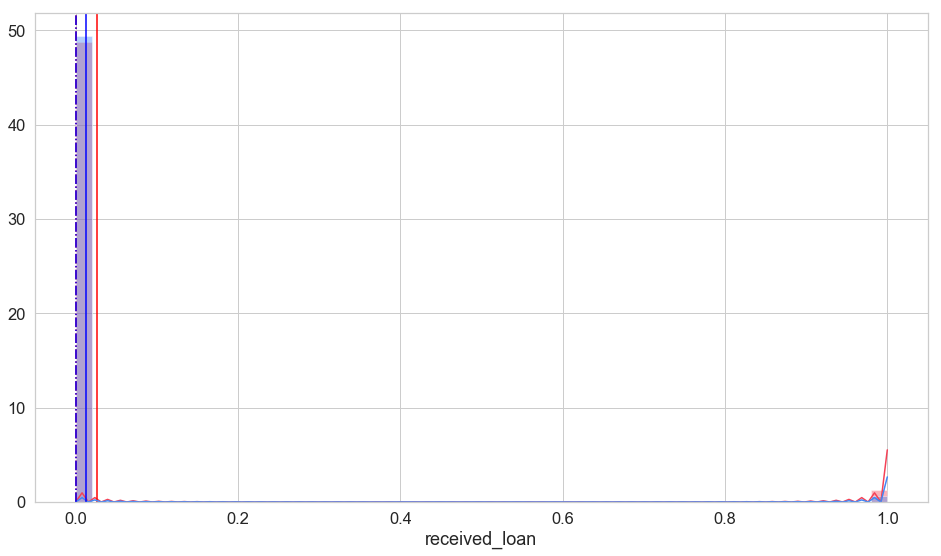

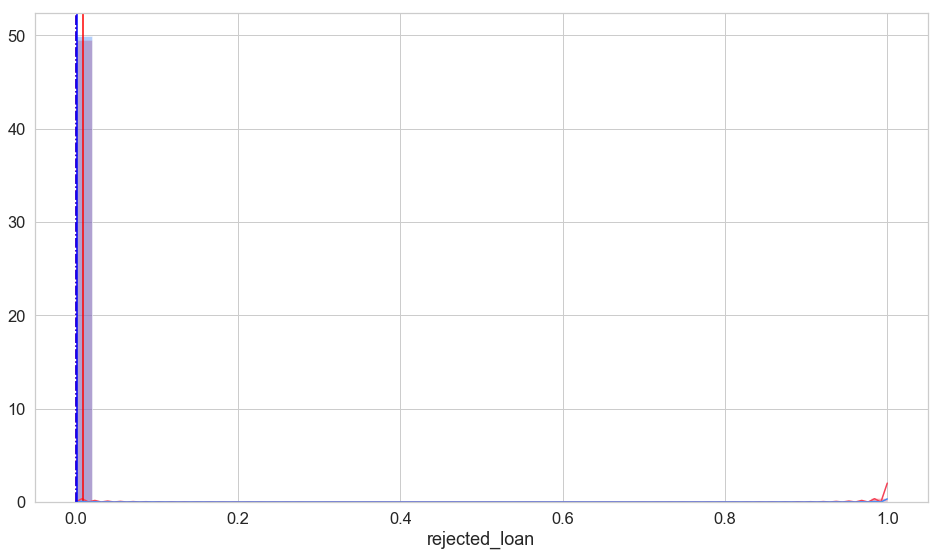

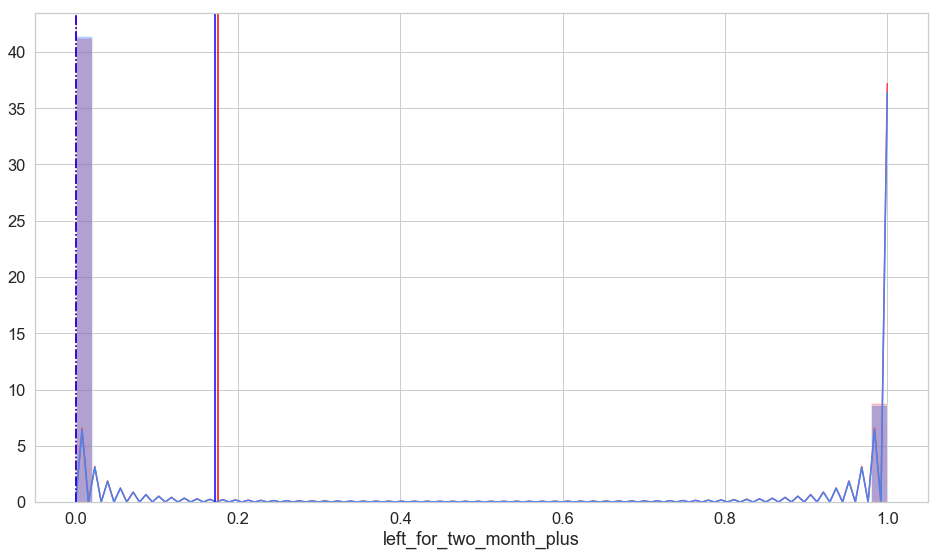

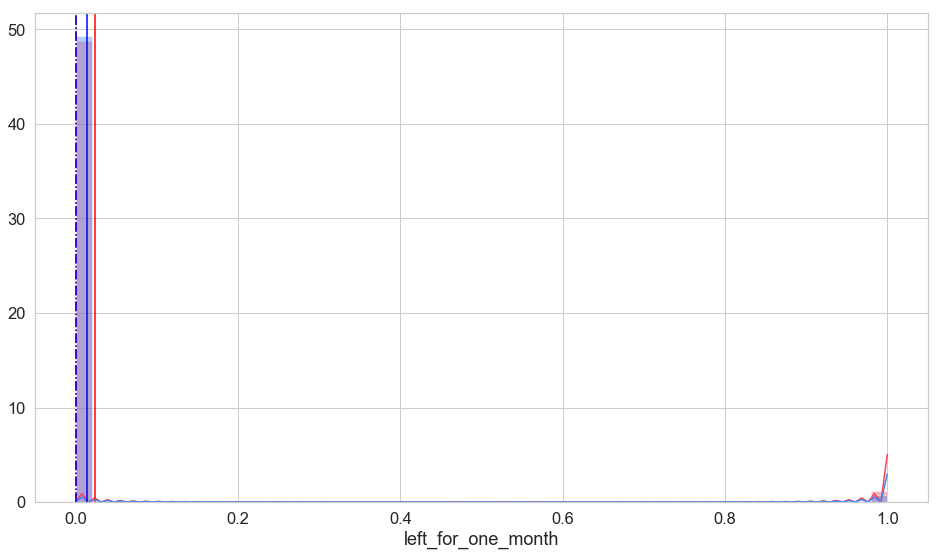

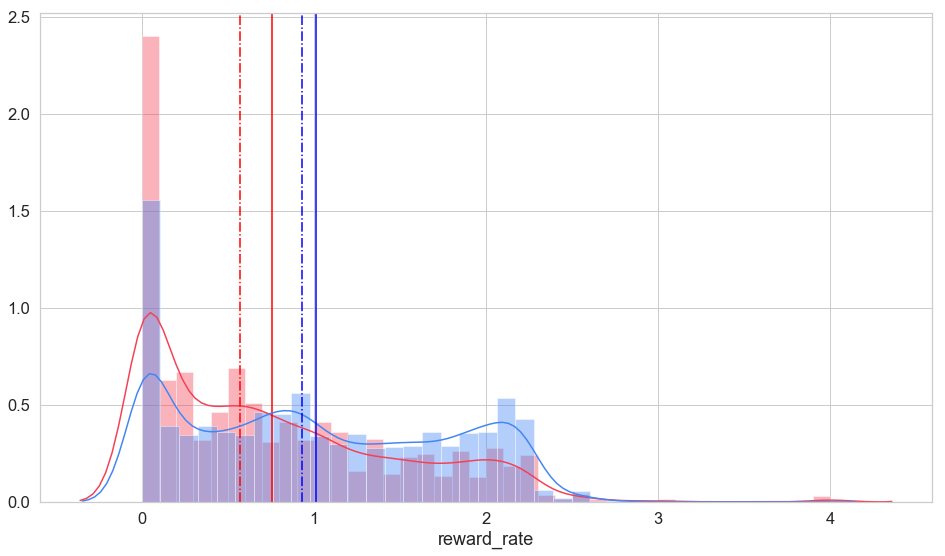

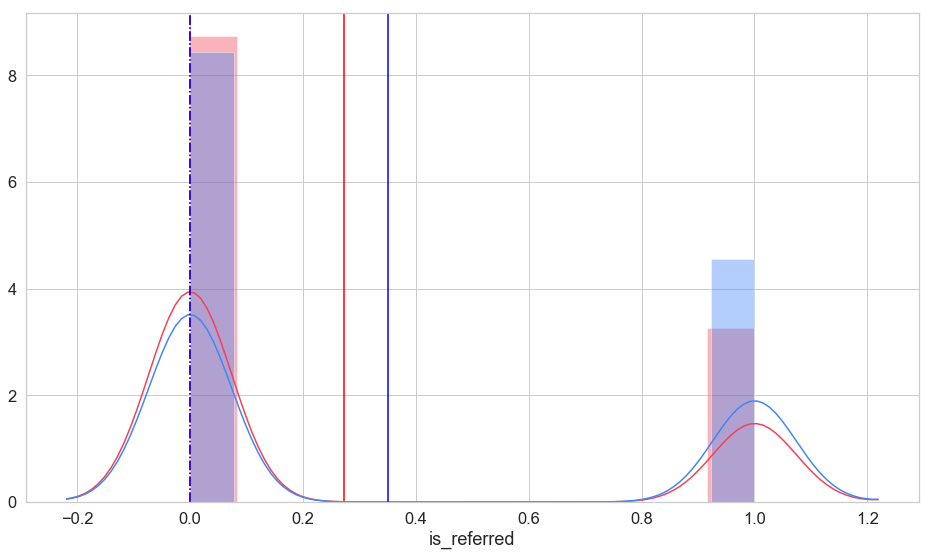

In [13]:
for e in df.describe().columns : 
    sns.distplot(df[df['churn'] == 1][e], label=('Churn') , color='#f44156')
    plt.axvline(df[df['churn'] == 1][e].mean() , c="red" , linestyle='-')
    plt.axvline(df[df['churn'] == 1][e].median() , c="red" , linestyle='-.')
    sns.distplot(df[df['churn'] == 0][e], label=('Churn') , color='#4286f4')
    plt.axvline(df[df['churn'] == 0][e].mean() , c="blue" , linestyle='-')
    plt.axvline(df[df['churn'] == 0][e].median() , c="blue" , linestyle='-.')
    plt.show()

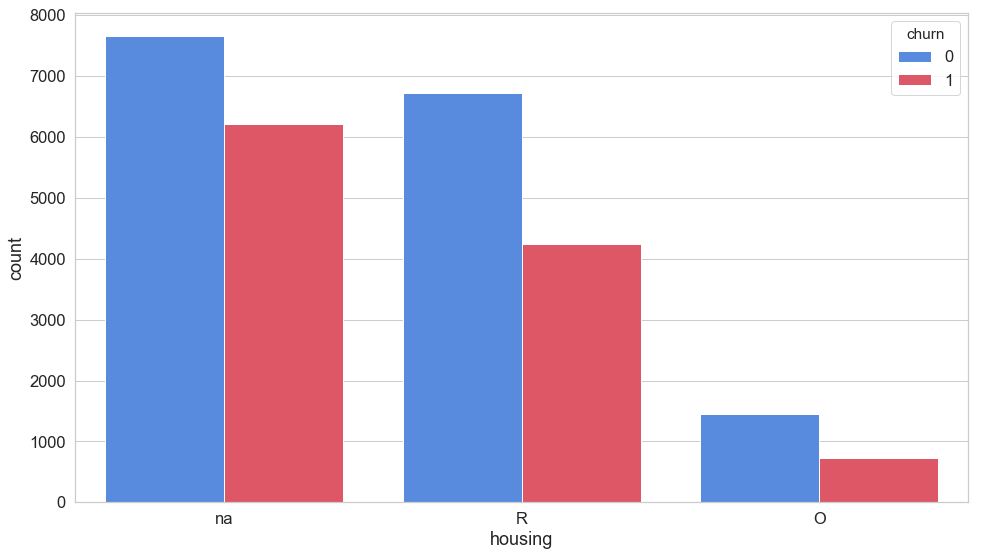

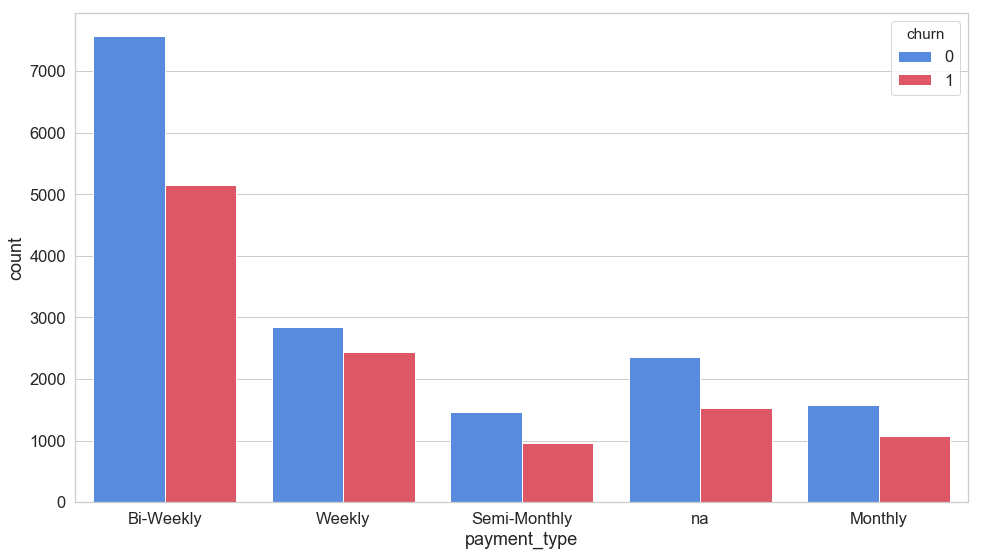

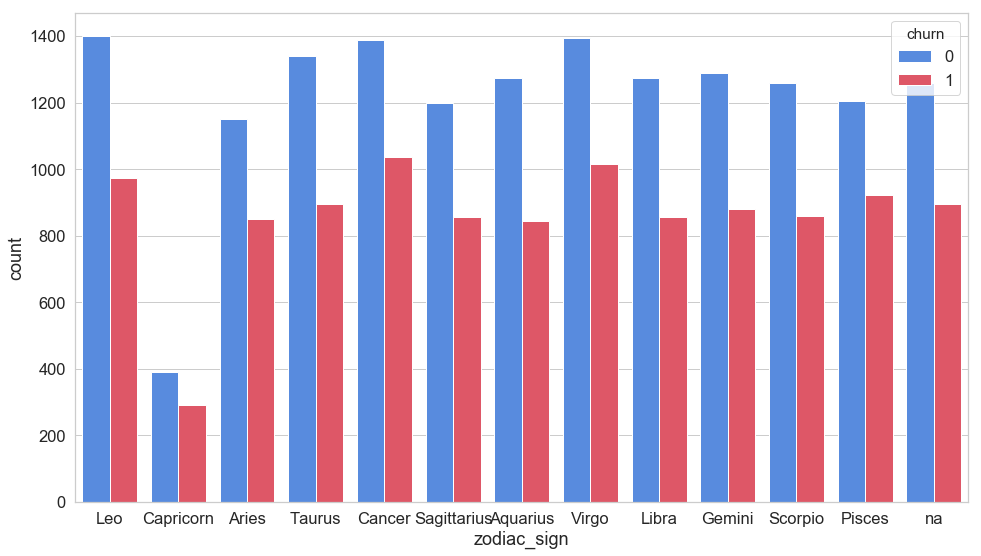

In [14]:
for e in ['housing','payment_type','zodiac_sign',] :
    sns.countplot(data=df , x=e , hue='churn' , palette=['#4286f4','#f44156'])
    plt.show()

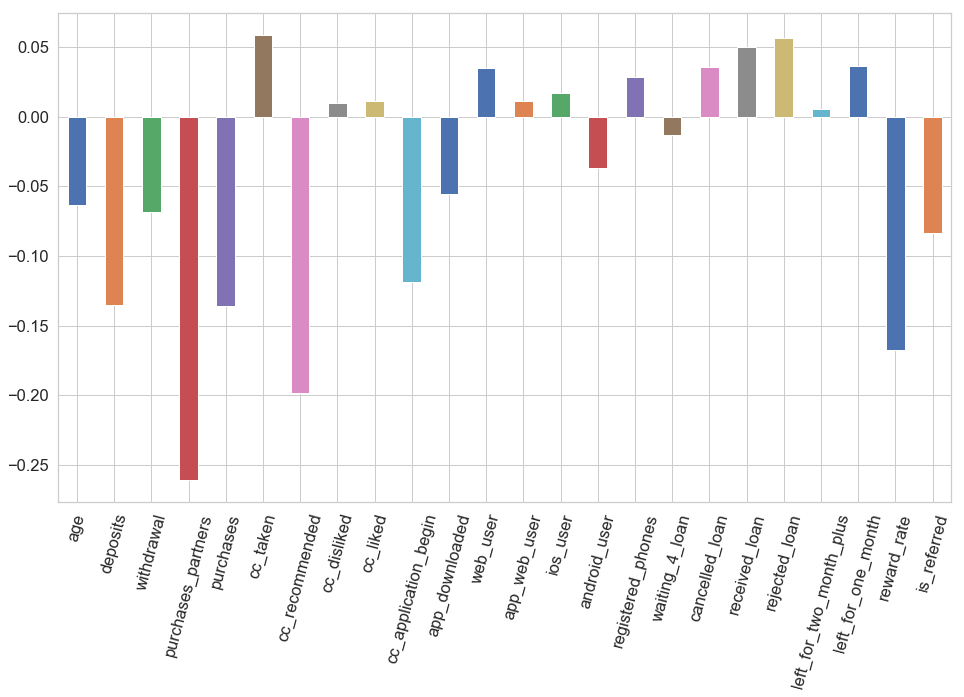

In [15]:
df.drop(columns=['housing','payment_type','zodiac_sign','churn'] , axis=1 ).corrwith(df['churn']).plot.bar(rot=75)

# matrice de corrélation

In [16]:
df.corr()

,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
churn,1.000000,-0.063206,-0.135381,-0.068543,-0.260784,-0.135921,0.058383,-0.198570,0.009423,0.010886,-0.118590,-0.055647,0.035053,0.011092,0.017026,-0.036626,0.028578,-0.013558,0.035275,0.049960,0.056457,0.005094,0.036134,-0.167193,-0.083241
age,-0.063206,1.000000,0.088757,0.044177,-0.000943,0.088769,0.077199,0.095860,0.005577,0.019512,0.164872,-0.113648,0.215194,0.163852,0.161702,-0.210068,-0.001354,0.004164,-0.003713,-0.001808,0.011030,-0.022500,0.034534,0.086167,-0.001557
deposits,-0.135381,0.088757,1.000000,0.488902,0.326588,0.998554,-0.047058,0.376123,-0.014680,-0.012111,0.452493,0.081717,0.076792,0.108327,0.042230,-0.002171,0.040044,-0.002928,0.011381,-0.009439,-0.018501,0.048370,-0.011354,0.267635,0.229957
withdrawal,-0.068543,0.044177,0.488902,1.000000,0.223692,0.488285,-0.040658,0.187423,-0.011105,-0.003197,0.295733,0.064956,0.047372,0.072647,0.039020,-0.004248,0.047112,0.003173,-0.002577,-0.006240,-0.009826,0.032079,-0.009968,0.125363,0.211614
purchases_partners,-0.260784,-0.000943,0.326588,0.223692,1.000000,0.326529,-0.101511,0.594491,-0.035335,-0.033016,0.411316,0.148423,0.063708,0.122143,0.029793,0.048343,0.072166,0.000089,0.014012,-0.015040,-0.030989,0.082333,-0.032074,0.432839,0.301542
purchases,-0.135921,0.088769,0.998554,0.488285,0.326529,1.000000,-0.047082,0.376666,-0.014583,-0.012194,0.453160,0.081647,0.076392,0.107905,0.041387,-0.001371,0.039667,-0.002712,0.011687,-0.009273,-0.018337,0.048654,-0.011511,0.268124,0.230099
cc_taken,0.058383,0.077199,-0.047058,-0.040658,-0.101511,-0.047082,1.000000,0.115100,0.182655,0.168530,0.165640,0.037674,0.057646,0.071845,0.063824,-0.044865,0.042719,-0.006079,0.004685,0.046760,0.006387,-0.016006,0.085823,0.149156,-0.025004
cc_recommended,-0.198570,0.095860,0.376123,0.187423,0.594491,0.376666,0.115100,1.000000,0.048076,0.055571,0.611520,0.231652,0.130145,0.221319,0.023953,0.093413,0.125966,-0.018087,0.014188,0.044977,-0.037966,0.045625,0.037735,0.877549,0.241626
cc_disliked,0.009423,0.005577,-0.014680,-0.011105,-0.035335,-0.014583,0.182655,0.048076,1.000000,0.095500,0.083475,0.012775,0.018129,0.023045,0.002125,0.005893,0.025728,-0.002094,0.011349,0.014676,-0.002854,-0.012925,0.033594,0.060708,-0.009285
cc_liked,0.010886,0.019512,-0.012111,-0.003197,-0.033016,-0.012194,0.168530,0.055571,0.095500,1.000000,0.068826,0.012293,0.022415,0.026994,0.015128,-0.005965,0.025381,-0.001984,0.002677,0.021603,-0.001630,-0.007150,0.007706,0.064473,-0.012215


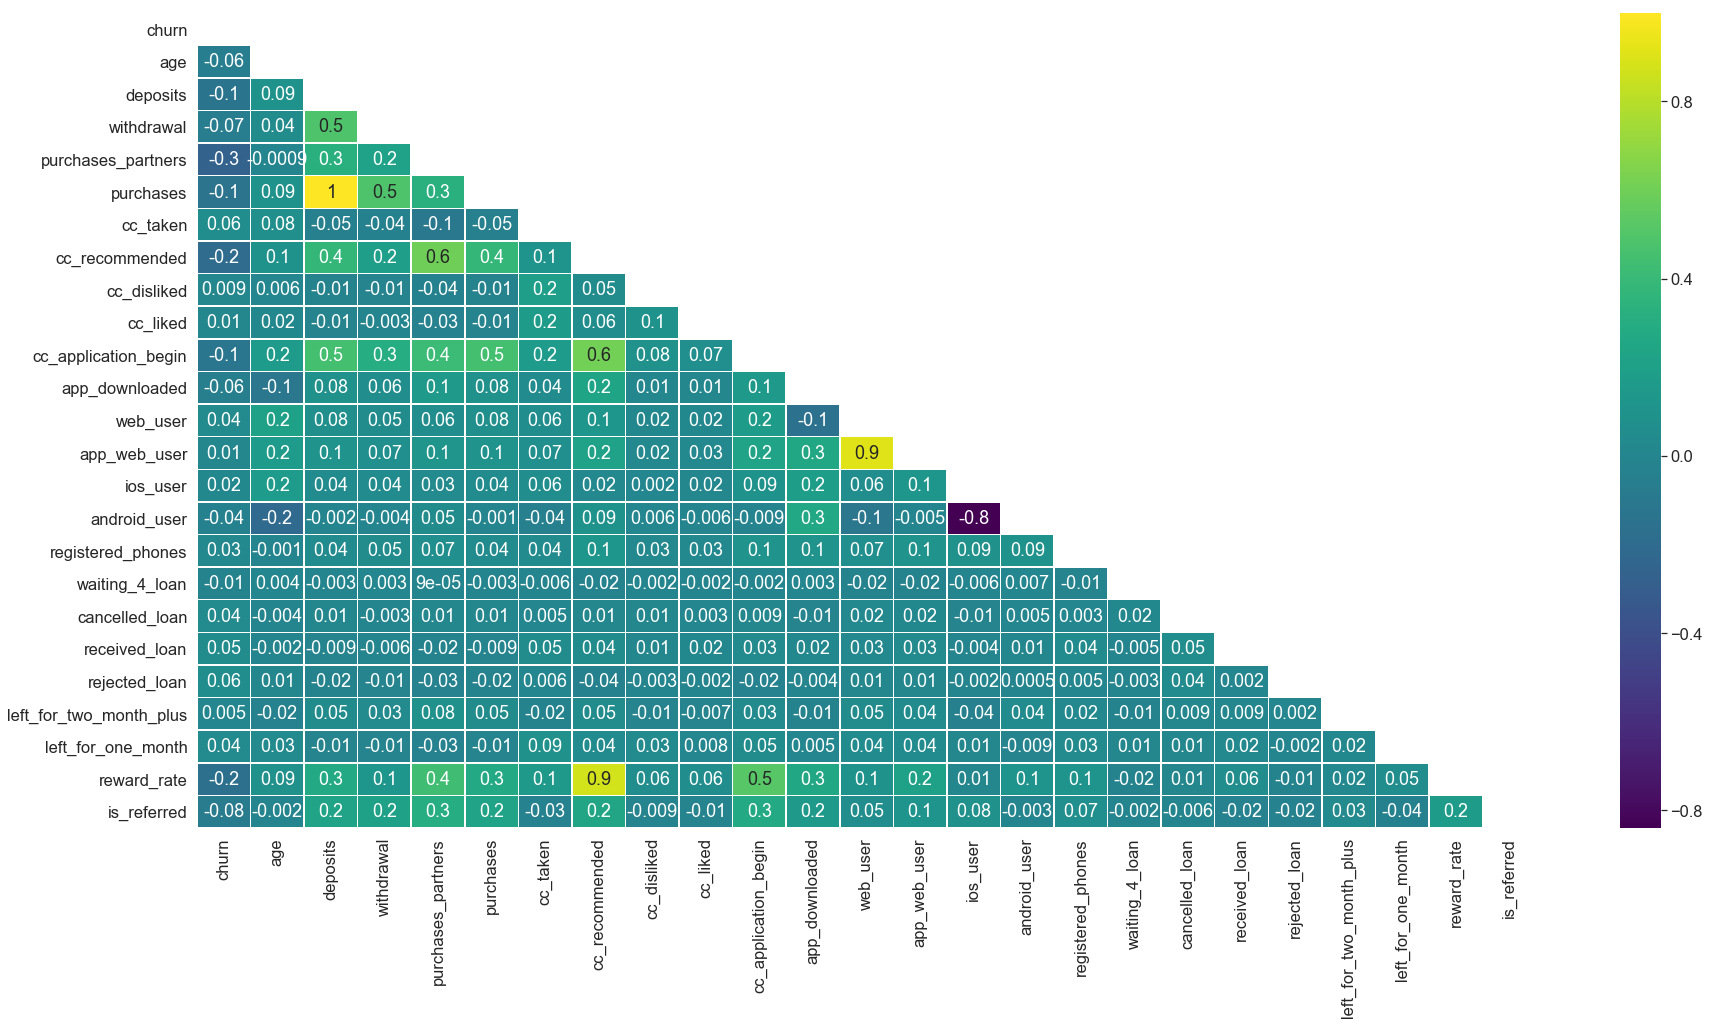

In [17]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr() , annot=True , cmap='viridis' , fmt='.1g' , mask=mask,
        linewidths=.5, )

In [18]:
df = df.drop(columns = ['app_web_user'])

In [19]:
df = pd.get_dummies(df )

In [20]:
df.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [21]:
df = df.drop(columns=['housing_na', 'payment_type_na','zodiac_sign_na'])

In [22]:
df.churn.value_counts()

0    15822
1    11174
Name: churn, dtype: int64

In [23]:
one = df[df["churn"] == 1]
zero = df[df["churn"] == 0][0:11174]


In [24]:
ddf = pd.concat([one , zero] )
ddf.head()

,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
61353,1,27.0,0,0,2,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0.03,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3120,1,32.0,5,3,111,5,0,227,0,0,17,1,1,0,1,0,0,0,0,0,0,0,1.83,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
65427,1,44.0,0,0,0,0,1,4,0,0,1,1,0,0,1,2,0,0,0,0,0,0,0.07,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
30419,1,24.0,6,2,24,6,0,55,0,0,4,1,0,0,1,0,0,0,0,0,0,0,0.90,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
34733,1,30.0,2,1,0,2,0,9,0,0,2,1,1,0,1,0,0,0,0,0,1,0,0.07,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [25]:
X = ddf.drop(columns = 'churn')
y = ddf['churn']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [27]:
y_train.value_counts()

0    8951
1    8927
Name: churn, dtype: int64

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Yasha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix , accuracy_score

In [30]:
c = [LogisticRegression]

# Ici, nous commençons à évaluer notre modèle avec une matrice de confusion, mais l’important est que le modèle n’a qu’une précision de 64%.
# c'est  pas facile de séparer les clients en fonction de l'annulation de leurs abonnements, comme nous l'avons vu précédemment dans le diagramme de distribution

C:\Users\Yasha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


----------------------
<class 'sklearn.linear_model.logistic.LogisticRegression'>
0.6400447427293064


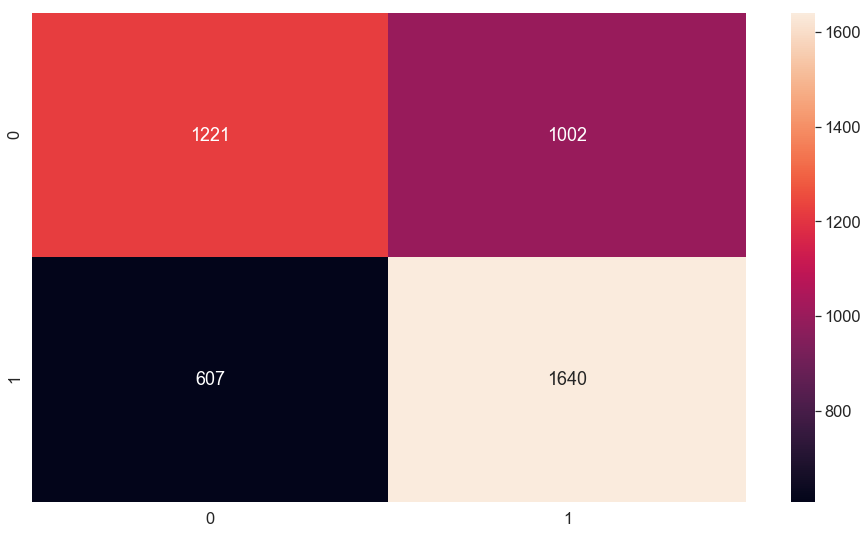

In [31]:
for i in c : 
    classifier = i()
    classifier.fit(X_train, y_train)
    ypred = classifier.predict(X_test)
    cm = confusion_matrix(y_test , ypred)
    sns.heatmap(cm , annot=True , fmt='g')
    print('----------------------')
    print(str(i))
    print(accuracy_score(y_test , ypred ))
    plt.show()

# nous pouvons essayer l'Algorithme du gradient pour optimiser le model

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15,random_state = 42)

In [33]:
import xgboost as xgb
xg_cl = xgb.XGBClassifier(objective="binary:logistic" , n_estimators=2000  ,booster='gbtree', learning_rate=0.1
,max_depth=11 )
xg_cl.fit(X_train , y_train , eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='auc', early_stopping_rounds=20, )

[0]	validation_0-auc:0.832094	validation_1-auc:0.740742
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.846377	validation_1-auc:0.755131
[2]	validation_0-auc:0.852411	validation_1-auc:0.762906
[3]	validation_0-auc:0.85707	validation_1-auc:0.766938
[4]	validation_0-auc:0.860528	validation_1-auc:0.767896
[5]	validation_0-auc:0.866178	validation_1-auc:0.770242
[6]	validation_0-auc:0.869154	validation_1-auc:0.772724
[7]	validation_0-auc:0.873539	validation_1-auc:0.775381
[8]	validation_0-auc:0.87635	validation_1-auc:0.776906
[9]	validation_0-auc:0.880982	validation_1-auc:0.77824
[10]	validation_0-auc:0.883314	validation_1-auc:0.779074
[11]	validation_0-auc:0.887282	validation_1-auc:0.780902
[12]	validation_0-auc:0.890321	validation_1-auc:0.78192
[13]	validation_0-auc:0.892619	validation_1-auc:0.783462
[14]	validation_0-auc:0.895643	validation_1-auc:0.783752
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=11, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# et en appliquant cela, nous obtenons une précision de 72,3%

0.7232329257381449


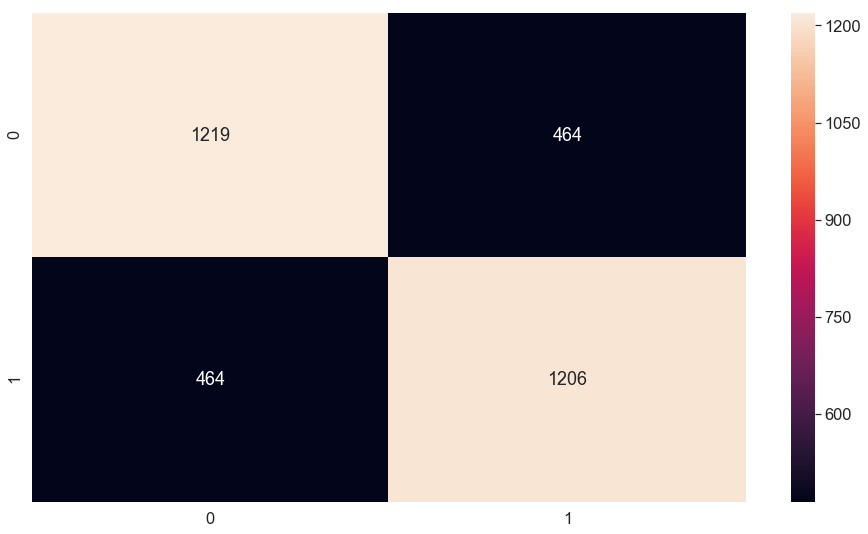

In [34]:
cm = confusion_matrix(y_test , xg_cl.predict(X_test))
print(accuracy_score(y_test , xg_cl.predict(X_test) ))
sns.heatmap(cm , annot=True , fmt='g')

In [35]:
from sklearn.metrics import classification_report
print(classification_report(xg_cl.predict(X_test) , y_test))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1683
           1       0.72      0.72      0.72      1670

   micro avg       0.72      0.72      0.72      3353
   macro avg       0.72      0.72      0.72      3353
weighted avg       0.72      0.72      0.72      3353



# ce plot montre les caractéristiques qu'il est plus important de prendre en compte lors des prédictions

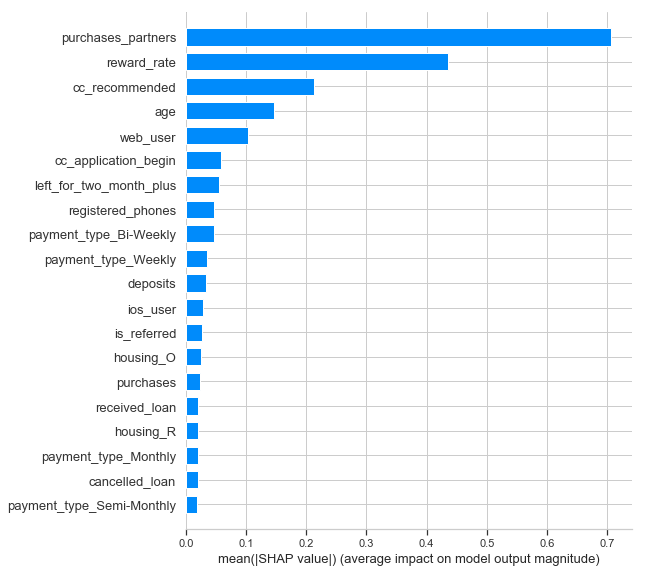

In [36]:
import shap #for SHAP values

explainer = shap.TreeExplainer(xg_cl)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test , plot_type="bar")

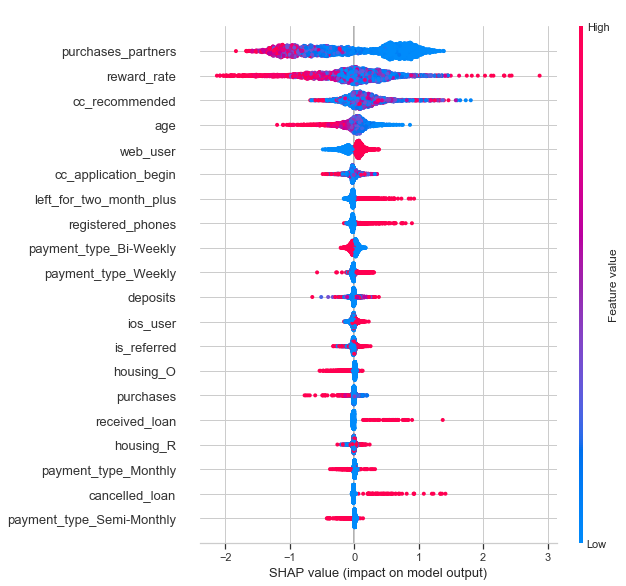

In [37]:
shap.summary_plot(shap_values, X_test)